# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Machine-learning-practice" data-toc-modified-id="Machine-learning-practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine learning practice</a></div><div class="lev2 toc-item"><a href="#Packages" data-toc-modified-id="Packages-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Packages</a></div><div class="lev2 toc-item"><a href="#Load-data" data-toc-modified-id="Load-data-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load data</a></div><div class="lev2 toc-item"><a href="#Load-Keras-and-run-first-network" data-toc-modified-id="Load-Keras-and-run-first-network-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Keras and run first network</a></div><div class="lev2 toc-item"><a href="#Network-Metrics" data-toc-modified-id="Network-Metrics-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Network Metrics</a></div><div class="lev1 toc-item"><a href="#Physics-Example" data-toc-modified-id="Physics-Example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Physics Example</a></div><div class="lev2 toc-item"><a href="#Another-helpful-python-package" data-toc-modified-id="Another-helpful-python-package-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Another helpful python package</a></div><div class="lev2 toc-item"><a href="#Build-the-combined-dataset" data-toc-modified-id="Build-the-combined-dataset-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Build the combined dataset</a></div><div class="lev2 toc-item"><a href="#Split-the-data-into-a-test-a-testing-and-training-set." data-toc-modified-id="Split-the-data-into-a-test-a-testing-and-training-set.-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split the data into a test a testing and training set.</a></div><div class="lev2 toc-item"><a href="#Build-and-train-a-network." data-toc-modified-id="Build-and-train-a-network.-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Build and train a network.</a></div><div class="lev1 toc-item"><a href="#Normalizing-the-data" data-toc-modified-id="Normalizing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Normalizing the data</a></div><div class="lev2 toc-item"><a href="#Build-and-fit-a-new-model" data-toc-modified-id="Build-and-fit-a-new-model-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Build and fit a new model</a></div><div class="lev2 toc-item"><a href="#Explore-training-methods" data-toc-modified-id="Explore-training-methods-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Explore training methods</a></div><div class="lev2 toc-item"><a href="#Network-architecture" data-toc-modified-id="Network-architecture-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Network architecture</a></div><div class="lev2 toc-item"><a href="#Longer-training" data-toc-modified-id="Longer-training-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Longer training</a></div><div class="lev2 toc-item"><a href="#Regularize-the-network" data-toc-modified-id="Regularize-the-network-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Regularize the network</a></div><div class="lev1 toc-item"><a href="#Different-representation-of-the-data" data-toc-modified-id="Different-representation-of-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Different representation of the data</a></div><div class="lev2 toc-item"><a href="#Neural-networks" data-toc-modified-id="Neural-networks-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Neural networks</a></div>

# Machine learning practice

Welcome to the second tutorial. In the first session, we started with linear regression and built up to logistic regression. We saw that this form of machine learning is really just an optimization problem. We define a test metric to determine how good of a fit we have, and then we use gradient descent to find the minimum of the loss function.

From this, we were able to build up to program a neural network from scratch! The hardest part of this was the back propagation, getting the gradients further back gets hard to keep track of everything. This is where some of the power of modern tools comes into play. Packages like [tensorflow](https://www.tensorflow.org/) and [pytorch](https://pytorch.org/) have an method to keep track of the gradients along the way, even for layers much more complicated that what we have used so far.

The docker container we are using contains *tensorflow* and [keras](https://keras.io/), which is built on top of tensorflow (or some other systems) and makes building networks very easy. In the rest of this tutorial we will explore how to make simple networks in *Keras*. As this will be easier than before, we will have time to gain an understanding for:
- Optimizers other than gradient descent
- Adding depth instead of width
- Different activation functions

In addition, we will look at some of the *important/best* practices for machine learning. These include:
- Metrics for comparing results
- Train/Validate/Test sets
- Preprocessing

This is the first time I have used this tutorial. Please send bugs or typos to bostdiek@gmail.com

## Packages
First, lets import the packages we will use.

In [1]:
# Allows for plotting within the notebook
%matplotlib inline

# Packages from last time
import numpy as np
import matplotlib.pyplot as plt

# For organization later
from collections import OrderedDict

In [2]:
# The commands make the plots look nice
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 12,
                     'figure.figsize': (3, 3),
                     'figure.dpi': 80,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                     })

## Load data

As a very brief introduction to keras, we will use the same 2D data from last session.

In [3]:
training = np.load('tutorial_1_data/logistic_regression_training.npy')
toy_X_Train = training[:, :2]
toy_Y_Train = training[:, 2].reshape(-1, 1)  # makes it a vector

validation = np.load('tutorial_1_data/logistic_regression_validation.npy')
toy_X_Val = validation[:, :2]
toy_Y_Val = validation[:, 2].reshape(-1, 1)  # makes it a vector

testing = np.load('tutorial_1_data/logistic_regression_testing.npy')
toy_X_Test = testing[:, :2]
toy_Y_Test = testing[:, 2].reshape(-1, 1)  # makes it a vector

## Load Keras and run first network
Load the parts of the package we need

In [4]:
from keras import Sequential    # This is the easiest method to build
                                # a network, but not the most flexible
    
from keras.layers import Dense  # For layers which are fully connected

Using TensorFlow backend.


This next cell is not necessary, but will supress some of the warning messages from tensorflow about depreciated components, which we are not using anyways.

In [5]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Now build a model.

In [6]:
model_0 = Sequential()

# First hidden
model_0.add(Dense(units=10,          # How many nodes
                  activation='relu', # What activation to use
                  input_dim=2        # Only needed for the first layer and
                                     # sets the dimensionality of the data
                 )
           )

# Output
model_0.add(Dense(units=1,              # Only one answer
                  activation='sigmoid'  # Map between 0 and 1
                 )
           )

# Now compile the network and tell it
# what loss function and optimizer to use
model_0.compile(loss='binary_crossentropy', optimizer='sgd')

**Note:** This serves as your example on building a network. You will have to generalize from this in the rest of the session.

SGD is stochastic gradient descent. Part of the 'stochastic' part is that the gradients are only computed on a small fraction of the dataset, instead of the whole dataset. This is the `batch_size` parameter that we will see below. See the website for the avilable [optimizers](https://keras.io/optimizers/) and [loss functions](https://keras.io/losses/).

We can also print a summary of our network to make sure that it looks like what we wanted, and to count the free parameters of the model.

In [7]:
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Now let's fit the data.

In [8]:
history_0 = model_0.fit(x=toy_X_Train,  # The input data
                        y=toy_Y_Train,  # The labels we want to predict
                        epochs=500,     # How long to train
                        batch_size=32,  # How many events to use to compute the gradient
                        validation_data=[toy_X_Val, toy_Y_Val], # the data and labels of the validation set
                        verbose=True    # To print out how the training is going
                       )

Train on 1000 samples, validate on 500 samples
Epoch 1/500
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6822 - val_loss: 0.6521
Epoch 2/500
1000/1000 [==============================] - 0s 104us/step - loss: 0.6573 - val_loss: 0.6409
Epoch 3/500
1000/1000 [==============================] - 0s 90us/step - loss: 0.6458 - val_loss: 0.6331
Epoch 4/500
1000/1000 [==============================] - 0s 94us/step - loss: 0.6372 - val_loss: 0.6259
Epoch 5/500
1000/1000 [==============================] - 0s 87us/step - loss: 0.6286 - val_loss: 0.6190
Epoch 6/500
1000/1000 [==============================] - 0s 114us/step - loss: 0.6208 - val_loss: 0.6122
Epoch 7/500
1000/1000 [==============================] - 0s 171us/step - loss: 0.6134 - val_loss: 0.6058
Epoch 8/500
1000/1000 [==============================] - 0s 182us/step - loss: 0.6060 - val_loss: 0.5993
Epoch 9/500
1000/1000 [==============================] - 0s 121us/step - loss: 0.5989 - val_loss: 0.5928
Epoch 10/500


That's all it took, much easier than before! Now we plot the losses on the validation and training sets like we did before, to make sure that we are not over-fitting the data. These are returned as when calling `model.fit()` which is why we set it equal to a new variable.

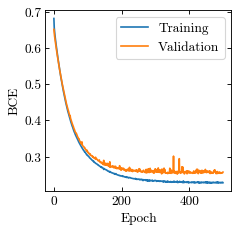

In [9]:
plt.plot(history_0.history['loss'], label='Training')
plt.plot(history_0.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('BCE')
plt.legend()
plt.show()

Both of the losses are similar, so we are not overfitting. Notice that there is more noise that last tutorial, this is because of the batches. The gradient can sometimes move us in the wrong direction because we are only taking a subset of the data each time. However, each *epoch*, or iteration through the data, now updates the paramters more times. (The length of the dataset divided by the batch size). With this, it takes less iterations.

## Network Metrics
The loss is clearly one way to determine which model is better. However, in physics we want to know what the efficiency of a cut is, how much background is cut out, etc. We will use the **Test** data for this. The *Validation* data could be used for this, because it was not explicitly trained on. However, we often use the validation data as a way to stop training early, in which case the network is not entirely independent from it. Metrics comparing results should **always** be on same independent data if possible.

The first metric we will look at is the Receiver Operating Characteristic (ROC) curve. To get this, we first need to get the predictions for the network on our test data.

**Exercise**: Use look up how to use the `predict` function of our model. Make a get a prediction for each event in the test dataset. (Hint, use model_0.predict)

In [10]:
### Enter code here ###
preds_model_0 = model_0.predict(toy_X_Test, verbose=False)
### End code here ###

Lets plot these results, first splitting into the signal and background cases.

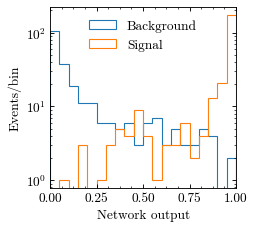

In [11]:
TestSigs = preds_model_0[toy_Y_Test == 1]
TestBack = preds_model_0[toy_Y_Test == 0]

plt.hist(TestBack, histtype='step',  # density='True',
         bins=20, range=(0, 1), label='Background')
plt.hist(TestSigs, histtype='step',  # density='True',
         bins=20, range=(0, 1), label='Signal')
plt.xlabel('Network output')
plt.ylabel('Events/bin')
plt.yscale('log')
plt.xlim(0, 1)
plt.minorticks_on()

plt.legend(loc='upper center', frameon=False)
plt.show()

As expected, the background events are clustered around 0 and the signal events are clustered around 1. Imagine cutting the data, and only the datapoints with a score larger than a certin number. If we start the cut at 0, all of the events make it through, so we have a signal efficiency $\epsilon_S$ and a background efficiency $\epsilon_B$ equal to 1. In the opposite extreme, we could only take events with a score larger than 1, in which case no events pass, thus $\epsilon_S = \epsilon_B = 0$. As we scan the value of the cut, $\epsilon_S$ and $\epsilon_B$ will work from 0 to 1, plotting these parametrically defines the ROC Curve. If $\epsilon_S=\epsilon_B$ everywhere, our model is never gaining an advantage over random guessing.

To compute the ROC curve, we will use part of scikit-learn.

In [12]:
from sklearn.metrics import roc_curve, auc

**Exercise:** Compute the ROC curve. (Hint, to bring up the doc string, run a cell with a question mark, as shown below). We should only need to supply y_true and y_score. The other arguments we can leave as default.

In [13]:
roc_curve?

In [14]:
### Enter code here ###
fpr_model_0, tpr_model_0, thresholds_model_0 = roc_curve(y_true=toy_Y_Test,
                                                         y_score=preds_model_0
                                                        )
### End code here ###

Now make the plot. The fpr is the *False positive rate* which is the same thing as $\epsilon_B$. The tpr is *True positie rate* which is $\epsilon_S$.

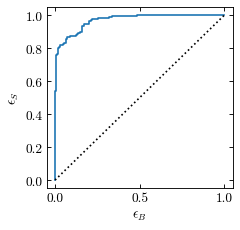

In [15]:
#Plot the epsilon_S along the y axis and epsilon_B along the x
plt.plot(fpr_model_0, tpr_model_0)
plt.plot([0,1], [0, 1], ls=':', color='k')  # interpolating between all events and no events
plt.xlabel(r'$\epsilon_B$')
plt.ylabel(r'$\epsilon_S$')
plt.show()

A perfect classifier would be able to get all of the signal events $\epsilon_S=1$ and none of the background $\epsilon_B=0$. Curves that are much above the dotted line are good classifier. Another metric related to these is the **Area under the curve** or (AUC). An AUC of 1 is perfect, while an AUC of 0.5 is random guessing. The AUC can be computed easily within `scikit-learn`.

**Exercise:** Compute the area under the curve using `auc`.

In [16]:
### Enter code here ###
auc_model_0 = auc(fpr_model_0, tpr_model_0)
### End code here ###

print('The area under the ROC curve is {0:.3f}'.format(auc_model_0))

The area under the ROC curve is 0.969


The AUC is a good metric, because it scans accross the efficiencies. However, it is dominated by the values at large $\epsilon_B$. In cutting out SM background at the LHC, we often need to cut out lots of background. The other metric we will use is the amount of background rejection at a signal efficiency of 0.7. There are a few ways that we can find this, but one of the easiest is to make an interpolating function.

In [17]:
from scipy.interpolate import interp1d

**Exercise:** Make an interpolating function to be able to compute the false positive rate for any true positive rate.

In [18]:
?interp1d
# Hint: We should only need to supply x and y, leave the rest of the arguments as their default values

In [19]:
### Enter code here ###
background_eff = interp1d(tpr_model_0, fpr_model_0)
### End code here ###

# Now we use the function to get the background efficiency at a
# fixed signal efficiency of 0.7
background_at_sig_70 = background_eff(0.7)
print('The e_B at a fixed e_S=0.7' + ': {0:.3e}'.format(background_at_sig_70))

The e_B at a fixed e_S=0.7: 8.097e-03


Because this is a small number, we can invert it. We can also plot the ROC curve with the signal efficiency on the $x$ axis, and invert the background efficiency.

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


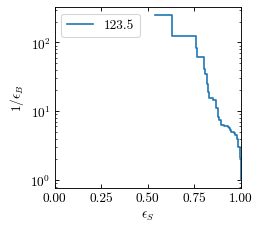

In [20]:
plt.plot(tpr_model_0,
         1/fpr_model_0, # in python 3 we can easily do division like this
         label='{0:.1f}'.format(1/background_at_sig_70)
        )
plt.xlabel('$\epsilon_{S}$')
plt.ylabel('$1/\epsilon_{B}$')
plt.xlim(0,1)
plt.yscale('log')
plt.legend()
plt.show()

This toy dataset does not have very large test set, so we cannot get great metrics. When you design a study, this needs to be kept in mind. Your test set needs to be large enough.

# Physics Example

Now that we have seen the basics on how to use `Keras` and how to compute metrics on our models, let's move to a physics example. In the `tutorial_2_data` are events generated with Sherpa which are di-gluon and di-quark (parton-level) events from 13 TeV proton-proton collisions. We then analyzed the resulting files by clustering the final-state particles with the anti-kt alogithm. The consituents which have been clustered into the jet with the largest transverse momentum are then put into a comma seperated file. Each row of the file is the hardest jet in each event. The columns are the $p_T$, $\eta$, and $\phi$ of up to 10 consituents. Note that we are treating the particles as massless. If there are less than 10 constituents, we fill its place with 0. Finally, the last column is a 0 for the gluons and a 1 for the quarks. Our goal is to make a classifier to distinguish the quarks from the gluons.

**Note:** We only have around 25000 samples for each jet type. For deep learning, it would be better to have much larger samples. While the results we get below may not look like deep learning is buying us anything, I hope that you at least get something from the concepts that we are looking at.

## Another helpful python package
To load the csv files, I will use the pandas package. I find it very helpful, but don't make the most use of it in this tutorial. 

In [21]:
import pandas as pd

In [22]:
# This cell just gets the names for the columns of the csv files
mynames = []
for i in range(10):
    mynames.append('pt_' + str(i))
    mynames.append('eta_' + str(i))
    mynames.append('phi_' + str(i))
mynames.append('label')
print(mynames)

['pt_0', 'eta_0', 'phi_0', 'pt_1', 'eta_1', 'phi_1', 'pt_2', 'eta_2', 'phi_2', 'pt_3', 'eta_3', 'phi_3', 'pt_4', 'eta_4', 'phi_4', 'pt_5', 'eta_5', 'phi_5', 'pt_6', 'eta_6', 'phi_6', 'pt_7', 'eta_7', 'phi_7', 'pt_8', 'eta_8', 'phi_8', 'pt_9', 'eta_9', 'phi_9', 'label']


In [24]:
gluons = pd.read_csv('tutorial_2_data/gluons.csv',
                     names=mynames
                    )
quarks = pd.read_csv('tutorial_2_data/quarks.csv',
                     names=mynames
                    )

One nice feature of pandas is the .describe() method.

In [25]:
quarks.describe()

,pt_0,eta_0,phi_0,pt_1,eta_1,phi_1,pt_2,eta_2,phi_2,pt_3,...,pt_7,eta_7,phi_7,pt_8,eta_8,phi_8,pt_9,eta_9,phi_9,label
count,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,...,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.0
mean,99.868124,-0.010417,0.000399,23.525718,-0.012556,-0.006846,8.651830,-0.009058,-0.011884,3.407782,...,0.068018,-0.000107,-0.001076,0.026844,-0.000500,0.000104,0.010418,0.000171,0.000186,1.0
std,43.845549,1.766024,1.819094,19.830798,1.645306,1.699246,10.760894,1.398809,1.450463,6.244984,...,0.660311,0.213323,0.230865,0.393201,0.136412,0.149426,0.241607,0.085856,0.095780,0.0
min,17.598162,-4.480908,-3.141352,0.000000,-4.487581,-3.141240,0.000000,-4.635915,-3.140442,0.000000,...,0.000000,-4.345793,-3.121720,0.000000,-3.787738,-3.102648,0.000000,-3.372562,-3.096406,1.0
25%,70.650691,-1.358023,-1.588945,7.779437,-1.143050,-1.371102,0.000000,-0.560769,-0.698150,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,95.472117,-0.012948,0.003044,20.736032,0.000000,0.000000,5.012954,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,118.606856,1.346902,1.564922,34.999105,1.117069,1.332775,14.139171,0.529091,0.658381,4.918974,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,888.779880,4.379363,3.141509,268.655967,4.460436,3.141411,131.884957,4.575803,3.141124,106.924806,...,23.683514,3.337376,3.134425,21.560405,3.285336,3.125994,12.848270,3.275494,2.979879,1.0


In [26]:
gluons.describe()

,pt_0,eta_0,phi_0,pt_1,eta_1,phi_1,pt_2,eta_2,phi_2,pt_3,...,pt_7,eta_7,phi_7,pt_8,eta_8,phi_8,pt_9,eta_9,phi_9,label
count,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,...,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.000000,24982.0
mean,73.085944,-0.005345,-0.014350,27.699384,-0.002868,-0.019085,13.364000,-0.004848,-0.007669,6.869738,...,0.312741,-0.000982,0.004935,0.131143,-0.001356,0.000129,0.056025,-0.000718,-0.000153,0.0
std,32.280898,1.440855,1.810752,15.614267,1.427400,1.791003,9.980091,1.360511,1.709085,6.955630,...,1.318021,0.409706,0.512490,0.841415,0.267222,0.343923,0.535684,0.168689,0.235015,0.0
min,12.380358,-4.390647,-3.141467,0.000000,-4.336327,-3.141561,0.000000,-4.823828,-3.141469,0.000000,...,0.000000,-4.171449,-3.141365,0.000000,-4.280714,-3.138935,0.000000,-3.764882,-3.131926,0.0
25%,49.942399,-1.053616,-1.596487,17.136536,-1.033446,-1.562080,5.996546,-0.907810,-1.395777,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,67.255419,-0.007617,-0.015355,26.132121,0.000000,0.000000,12.340809,0.000000,0.000000,5.606093,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,90.016092,1.045290,1.551206,36.228966,1.024281,1.512338,19.096888,0.896650,1.359821,10.918754,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,436.024955,4.393805,3.140952,188.794698,4.487917,3.141457,121.194215,4.698933,3.141503,75.580034,...,28.503468,3.791294,3.137696,25.507687,3.613124,3.127503,19.139419,3.784662,3.133118,0.0


Examine the dataset. Plot the distributions of the $p_T$, $\eta$, and $\phi$ for the 10 different consituents of the quark and gluon jets.

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
  MathTextWarning)


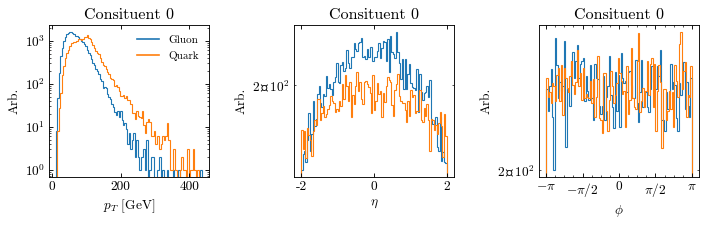

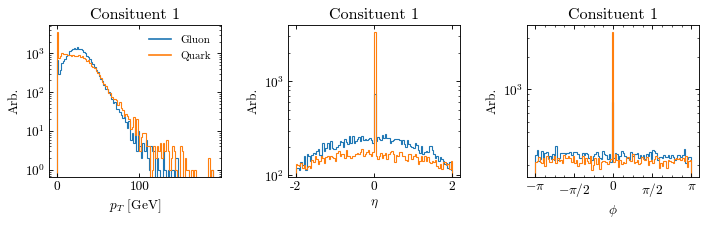

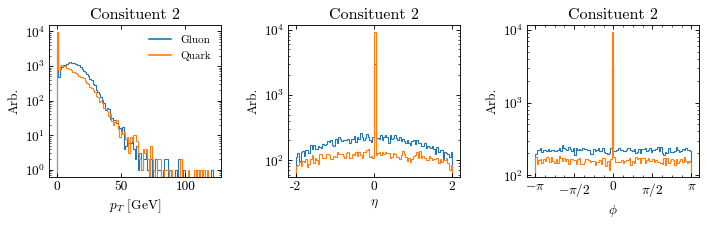

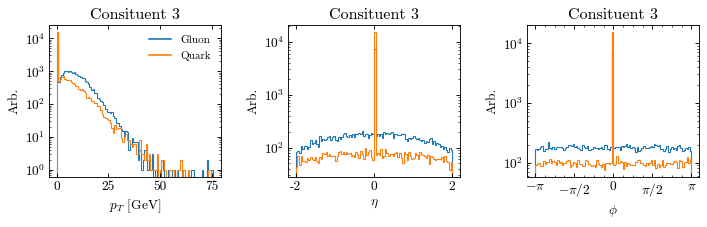

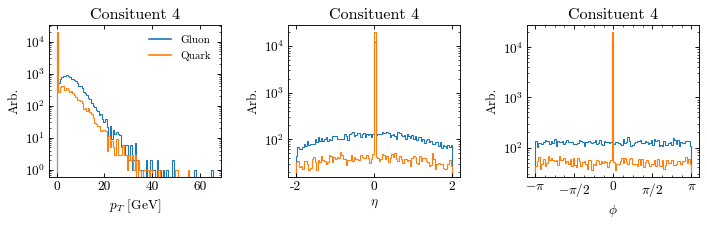

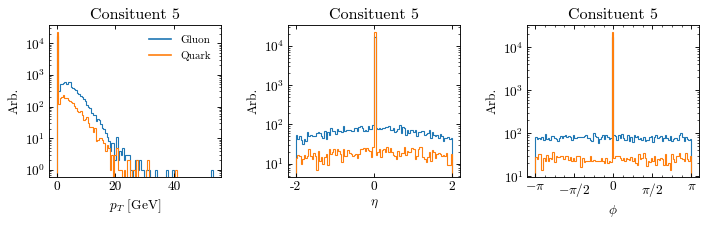

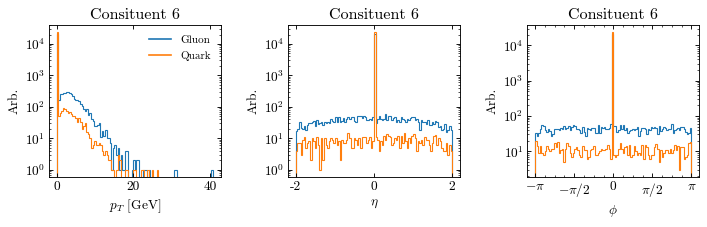

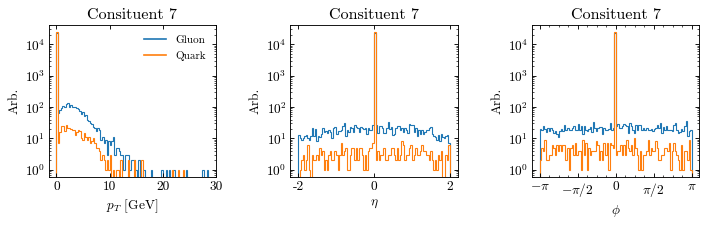

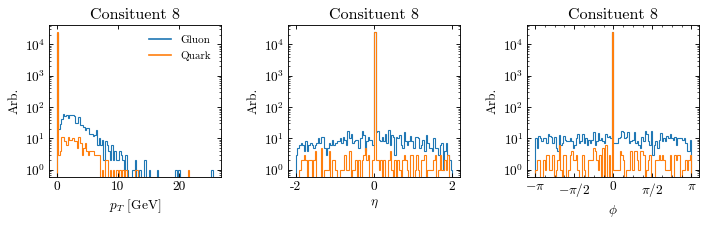

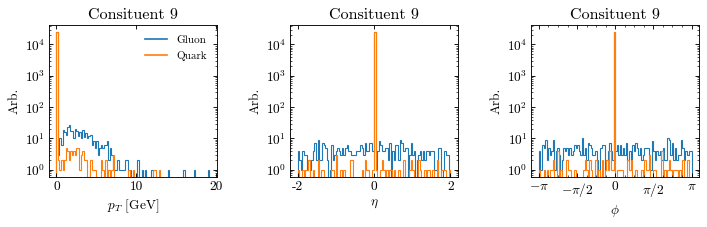

<Figure size 720x240 with 0 Axes>

In [27]:
plt.figure(figsize=(9, 3))
for name in mynames:
    if 'pt' in name:
        plt.subplot(1, 3, 1)
        h, bins, _ = plt.hist(gluons[name], histtype='step', bins=100)
        plt.hist(quarks[name], histtype='step', bins=bins)
        plt.plot([], [], color='C0', label='Gluon')
        plt.plot([], [], color='C1', label='Quark')
        plt.xlabel('$p_T$ [GeV]')
        plt.ylabel('Arb.')
        plt.title('Consituent {0}'.format(name.split('_')[-1]))
        plt.yscale('log')
        plt.legend(loc='best', frameon=False, fontsize=10)
        
    if 'eta' in name:
        plt.subplot(1, 3, 2)
        h, bins, _ = plt.hist(gluons[name], histtype='step', bins=100, range=(-2, 2))
        plt.hist(quarks[name], histtype='step', bins=bins)
        plt.plot([], [], color='C0', label='Gluon')
        plt.plot([], [], color='C1', label='Quark')
        plt.xlabel('$\eta$')
        plt.ylabel('Arb.')
        plt.title('Consituent {0}'.format(name.split('_')[-1]))
        plt.yscale('log')
        
    if 'phi' in name:
        plt.subplot(1, 3, 3)
        h, bins, _ = plt.hist(gluons[name], histtype='step', bins=100, range=(-np.pi, np.pi))
        plt.hist(quarks[name], histtype='step', bins=bins)
        plt.plot([], [], color='C0', label='Gluon')
        plt.plot([], [], color='C1', label='Quark')
        plt.xlabel('$\phi$')
        plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                   ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$']
                  )
        plt.ylabel('Arb.')
        plt.title('Consituent {0}'.format(name.split('_')[-1]))
        plt.yscale('log')
        plt.minorticks_on()
        
        plt.tight_layout(w_pad=2)
        plt.show()
        plt.figure(figsize=(9, 3))


There are definitely differences in some of these distributions. Noticeably, the quark jets tend to have fewer constituents, so there are more events in the `0` bin, because of the way we zero padded for empty events. Now let's put the two sets together into a single dataset so that we can feed it into a neural network.

## Build the combined dataset
Our data is currently in two different pandas DataFrame objects. To run the events through a neural network for training, we need to combined them. 
Use `np.vstack()` to combine the quark and gluon arrays into a single array.

In [28]:
np.vstack?

In [29]:
### Enter code here ###
Combined = np.vstack([quarks, gluons])
### End code here ###

Lets print the shape to see that it makes sense. Do we have the same number of columns as we had before?

In [30]:
Combined.shape

(49980, 31)

You should have the second dimension of the shape be 31. This is split between the 30 inputs and the 1 label. Now we  strip off the label and the data into seperate arrays.

In [31]:
X_data = Combined[:, :-1]
Y_data = Combined[:, -1].reshape(-1, 1)

print(X_data.shape, Y_data.shape)

(49980, 30) (49980, 1)


## Split the data into a test a testing and training set.
Now all of our data is in one array. This would work, but we want an independent test set, which we do not train on. To do this in a very easy way, we will use part of the scikit-learn package.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_test_split?

**Exercise:** Split the data into a testing a training set. Make the test set have 10% of the data.

In [34]:
### Enter code here ###
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=42)
### End code here ###

Verify that the data (marked by X) has the same number of columns. Make sure both X_train and y_train have the same number of rows, and similarly for the test data.

In [35]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(44982, 30)
(44982, 1)
(4998, 30)
(4998, 1)


## Build and train a network.
Make a network which has 1 hidden layer which uses either a `relu` or `tanh` activation. As our data is 30 dimensional, let's first try using 50 nodes on the hidden layer. Then have an output layer with 1 node, using a sigmoid activation. Compile the network using the binary cross entropy loss function and the stochastic gradient descent optimizer.

**Exercise:** Finish building and compiling the model below. 

In [36]:
### Enter code here ###
model_1 = Sequential()
model_1.add(Dense(50, input_dim=30, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='sgd')
### End code here ###
    
# Print a summary of your model
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


Now that we have the model built. Let's fit it.

**Exercise:** Use model_1.fit to train the model. Train for 10 epochs and use validation split of 10%. Note that we haven't used this option before, so I have include that here, but will not in the future.

Hint: This model should not train well. Do not be afraid if it doesn't work. This is part of the process.

In [37]:
### Enter code here ###
model_1.fit(X_train, y_train,
            validation_split=0.1,
            epochs=15
           )
### End code here ###

Train on 40483 samples, validate on 4499 samples
Epoch 1/15
40483/40483 [==============================] - 5s 116us/step - loss: 1.2144 - val_loss: 0.6248
Epoch 2/15
40483/40483 [==============================] - 4s 95us/step - loss: 0.6164 - val_loss: 0.6202
Epoch 3/15
40483/40483 [==============================] - 3s 85us/step - loss: 0.6118 - val_loss: 0.6873
Epoch 4/15
40483/40483 [==============================] - 4s 91us/step - loss: 0.6086 - val_loss: 0.6256
Epoch 5/15
40483/40483 [==============================] - 3s 70us/step - loss: 0.6061 - val_loss: 0.6213
Epoch 6/15
40483/40483 [==============================] - 3s 77us/step - loss: 0.6052 - val_loss: 0.6145
Epoch 7/15
40483/40483 [==============================] - 3s 74us/step - loss: 0.6051 - val_loss: 0.6141
Epoch 8/15
40483/40483 [==============================] - 3s 78us/step - loss: 0.6030 - val_loss: 0.6098
Epoch 9/15
40483/40483 [==============================] - 3s 74us/step - loss: 0.6026 - val_loss: 0.6241
Epoch

Notice that the loss did not seem to decrease as we were training. This doesn't seem good! To make sure, lets see how the test set does.

**Exercise:**
Compute the predictions and then tthe ROC curve and AUC for model_1.

In [38]:
### Enter code here ###
preds_model_1 = model_1.predict(X_test)
fpr_model_1, tpr_model_1, thresholds_model_1 = roc_curve(y_true=y_test, y_score=preds_model_1)
auc_model_1 = auc(fpr_model_1, tpr_model_1)
### End code here ###

And now we plot the result.

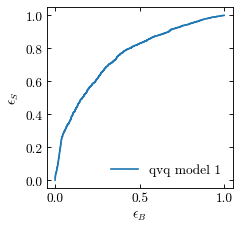

The AUC is 0.75


In [39]:
plt.plot(fpr_model_1, tpr_model_1, label='qvq model 1')
plt.xlabel('$\epsilon_B$')
plt.ylabel('$\epsilon_S$')
plt.legend(loc='best', frameon=False)
plt.show()

print('The AUC is {0:0.2f}'.format(auc_model_1))

This confirms what we thought! The network does not seem to be able to figure anything out about this dataset. Part of this has to do with the different scales of our data, let's explore this more in the next section.

# Normalizing the data
If we go back and look at the distributions of the input data, we notice that the ranges of the values are very different, especially the transvere momenta. Trying to find the minimum of the loss is much harder when the scales and the variance of the data is very different. To account for this, we normalize the data. There are many ways to do this, but one common way is to individually subtract the mean of each obsesrvable and then divide by the variance. Thus each input variable will have 0 mean and unit variance. Another common method is to scale the data such that the min is at 0 and the max is at 1. 

Both of these methods distort the data, and break Lorentz invariance. There is some research into making networks (and scaling) which respect physics invariant, but we can get good classifiers without worrying about this. 

For now, let use the 0 mean and unit variance. We can compute this ourselves, or use the `sklearn.preprocessing.StandardScaler`

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
StandardScaler?

In [42]:
SS = StandardScaler()

In [43]:
X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

## Build and fit a new model

Setting all of the different random number generators to the same values is actually very hard within Keras/Tensorflow/Numpy. Because of this, exact reproducibility is not possible. To **really** trust our results, the best thing would be to retrain many times and compute means and variances of our results. For time we will not do that here. 

**NOTE:** Your results may differ from what the discussion around it says because of this. I have tried to write in in a way that you can generalize, but please let me know if something does not make sense

We will now build an identical network to our previous one. We give it a different name so we can compare with the old results.

In [44]:
### Enter code here ###
model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='sgd')
### End code here ###

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


**Exercise:** Now fit the network using the scaled data which we just computed. Use 15 epochs for now.

In [45]:
history_2 = model_2.fit(X_train_scaled, y_train,
                        validation_split=0.1,
                        epochs=15
                       )

Train on 40483 samples, validate on 4499 samples
Epoch 1/15
40483/40483 [==============================] - 4s 107us/step - loss: 0.6405 - val_loss: 0.6147
Epoch 2/15
40483/40483 [==============================] - 3s 67us/step - loss: 0.6045 - val_loss: 0.6049
Epoch 3/15
40483/40483 [==============================] - 3s 68us/step - loss: 0.5969 - val_loss: 0.5999
Epoch 4/15
40483/40483 [==============================] - 3s 68us/step - loss: 0.5925 - val_loss: 0.5968
Epoch 5/15
40483/40483 [==============================] - 3s 74us/step - loss: 0.5896 - val_loss: 0.5947
Epoch 6/15
40483/40483 [==============================] - 3s 72us/step - loss: 0.5873 - val_loss: 0.5923
Epoch 7/15
40483/40483 [==============================] - 3s 77us/step - loss: 0.5856 - val_loss: 0.5913
Epoch 8/15
40483/40483 [==============================] - 3s 75us/step - loss: 0.5841 - val_loss: 0.5911
Epoch 9/15
40483/40483 [==============================] - 3s 67us/step - loss: 0.5830 - val_loss: 0.5893
Epoch

Now we plot the histories.

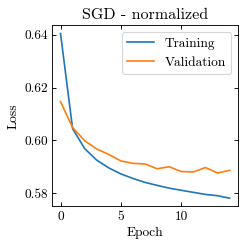

In [46]:
plt.plot(history_2.history['loss'], label='Training')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('SGD - normalized')
plt.show()

There are a few things to note from this.

1. The training loss has not stopped going down, so we should really train for more than 15 epochs. However, right now we are just testing things out, and this gives us an idea for how the model is doing.
2. This is the first time we have seen the training and validation loss being different. This shows that we are slightly over fitting the data. This is not necessarily a big deal at this point, but something to look out for. If we trained for longer and the training loss got further and further from the validation loss, we would want to do something to fix this. Methods to do this are called *regularization*, and can include adding extra terms to the loss so that individual network weights cannot get to big ([l1 or l2](https://keras.io/regularizers/) regularization) or randomly ignoring certain nodes during training ([dropout](https://keras.io/layers/core/#dropout)). 

  Another way to compete against over-fitting is to get more data. You can test this by instead fitting on a very small amount of data. You should see the losses diverge then.

Even though we are slightly over-fitting, and the training has not reached its asymptote, lets compute the test metrics.

In [47]:
preds_model_2 = model_2.predict(X_test_scaled)
fpr_model_2, tpr_model_2, thresholds_model_2 = roc_curve(y_true=y_test, y_score=preds_model_2)
auc_model_2 = auc(fpr_model_2, tpr_model_2)

In [48]:
from scipy.interpolate import interp1d

background_eff_2 = interp1d(tpr_model_2, fpr_model_2)
background_at_sig_50_2 = background_eff_2(0.5)
print('The $\epsilon_B$ at a fixed $\epsilon_S=0.5$' + ': {0:.3e}'.format(background_at_sig_50_2))

The $\epsilon_B$ at a fixed $\epsilon_S=0.5$: 1.410e-01


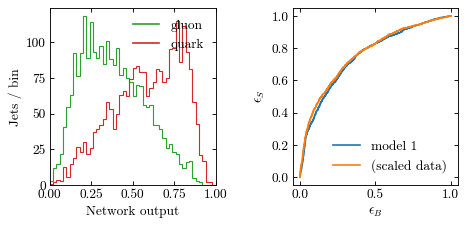

The AUC is 0.7623


In [49]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.hist(preds_model_2[y_test == 0], range=(0, 1), bins=50, histtype='step', color='C2')
plt.hist(preds_model_2[y_test == 1], range=(0, 1), bins=50, histtype='step', color='C3')
plt.xlim(0, 1)
plt.plot([], [], color='C2', label='gluon')
plt.plot([], [], color='C3', label='quark')
plt.legend(loc='best', frameon=False)
plt.xlabel('Network output')
plt.ylabel('Jets / bin')

plt.subplot(1, 2, 2)
plt.plot(fpr_model_1, tpr_model_1, label='model 1')
plt.plot(fpr_model_2, tpr_model_2, label='(scaled data)')
plt.xlabel('$\epsilon_B$')
plt.ylabel('$\epsilon_S$')
plt.legend(loc=('best'), frameon=False)

plt.tight_layout(w_pad=2)
plt.show()

print('The AUC is {0:0.4f}'.format(auc_model_2))

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


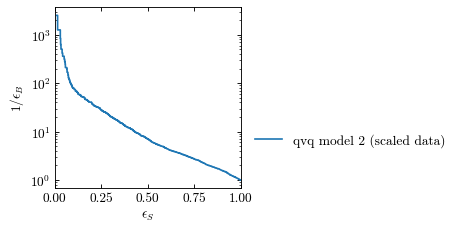

The 1 / epsilon_B at a fixed e_S=0.5: 7.09


In [50]:
# plt.plot(tpr_model_1, 1/fpr_model_1,  label='qvq model 1')
plt.plot(tpr_model_2, 1/fpr_model_2, label='qvq model 2 (scaled data)')
plt.ylabel('$1/\epsilon_B$')
plt.xlabel('$\epsilon_S$')
plt.yscale('log')
plt.xlim(0, 1)
plt.legend(loc=(1.05,0.2), frameon=False)
plt.show()

print('The 1 / epsilon_B at a fixed e_S=0.5' + ': {0:.2f}'.format(1/background_at_sig_50_2))

From this, we see that we are getting a predictive model. Normalizing the data made a huge difference! Without normalizing, the network couldn't even start to train. The normalized model does better on the training data, and it also generalizes to the test data. We are able to split the quark and gluon jets. We will now cycle through some different options to see if we can do better.

## Explore training methods
Stochastic gradient descent is what we worked out last time, where each update to the model parameters is in the direction of the gradient at that point. However, there are other methods, which keep 'momentum' as the optimizer rolls down the hill of the loss potential. We can use these easily because keras has the optimizers built in.

**Exercise:** Add a network to the dictionary for each training method.

In [51]:
trainining_methods=['rmsprop', 'adam']

# Make python dictionaries to save our results
training_method_models = {}
training_histories = {}

for method in trainining_methods:
    print('Using ' + method)
    
    ### Enter code here ###
    temp_model =  Sequential()
    temp_model.add(Dense(50, activation='relu', input_dim=X_train_scaled.shape[1]))
    temp_model.add(Dense(1, activation='sigmoid'))
    temp_model.compile(loss='binary_crossentropy',
                       optimizer=method)
    
    # Fit the model
    temp_history = temp_model.fit(X_train_scaled, y_train,
                                  validation_split=0.1,
                                  epochs=15)
    ### End code here ###
    
    # Now put the model into the dictionary
    training_method_models[method] = temp_model
    
    # Now train the model
    training_histories[method] = temp_history

Using rmsprop
Train on 40483 samples, validate on 4499 samples
Epoch 1/15
40483/40483 [==============================] - 4s 108us/step - loss: 0.6041 - val_loss: 0.5914
Epoch 2/15
40483/40483 [==============================] - 3s 77us/step - loss: 0.5872 - val_loss: 0.5908
Epoch 3/15
40483/40483 [==============================] - 3s 86us/step - loss: 0.5831 - val_loss: 0.5878
Epoch 4/15
40483/40483 [==============================] - 3s 82us/step - loss: 0.5815 - val_loss: 0.5865
Epoch 5/15
40483/40483 [==============================] - 3s 70us/step - loss: 0.5797 - val_loss: 0.5851
Epoch 6/15
40483/40483 [==============================] - 3s 71us/step - loss: 0.5784 - val_loss: 0.5890
Epoch 7/15
40483/40483 [==============================] - 3s 78us/step - loss: 0.5776 - val_loss: 0.5887
Epoch 8/15
40483/40483 [==============================] - 3s 74us/step - loss: 0.5765 - val_loss: 0.5849
Epoch 9/15
40483/40483 [==============================] - 3s 73us/step - loss: 0.5753 - val_loss

Plot the comparisons of loss of the training methods.

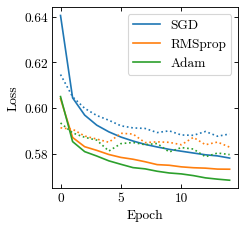

In [52]:
plt.plot(history_2.history['loss'], color='C0', label='SGD')
plt.plot(training_histories['rmsprop'].history['loss'], color='C1', label='RMSprop')
plt.plot(training_histories['adam'].history['loss'], color='C2', label='Adam')

plt.plot(training_histories['rmsprop'].history['val_loss'], color='C1', ls=':')
plt.plot(training_histories['adam'].history['val_loss'], color='C2', ls=':')
plt.plot(history_2.history['val_loss'], color='C0', ls=':')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
# plt.title('SGD - normalized')
plt.show()

Note that on the training data, Adam and RMSPROP do better than SGD. In general, SGD will eventually converge to the minimum, but it is slower than other alogrithms. The most popular optimizer to use currently is Adam. It is also important to note that is the methods doing better on the training sample do not always do better on the validation data. Again, all of the validation losses are still improving, so training is still making the model do better on data it hasn't seen yet.

Now we want to compute our test metrics. We will again add these to dictionaries so that they are easy to call later.

**Exercise:** Compute the test metrics

In [53]:
preds_methods = {}
fpr_methods = {}
tpr_methods = {}
thresholds_methods = {}
auc_methods = {}
working_point_methods = {}

for method in trainining_methods:
    
    # Get the trained model from our models dictionary
    tmp_model = training_method_models[method]
    
    ### Enter code here ###
    tmp_preds = tmp_model.predict(X_test_scaled)
    tmp_fpr, tmp_tpr, tmp_thresholds = roc_curve(y_true=y_test, y_score = tmp_preds)
    tmp_auc = auc(tmp_fpr, tmp_tpr)
    ### End code here ###
    
    # Fill in the different result dictionaries
    preds_methods[method] = tmp_preds
    fpr_methods[method] = tmp_fpr
    tpr_methods[method] = tmp_tpr
    thresholds_methods[method] = tmp_thresholds
    auc_methods[method] = tmp_auc
    
    # Now compute the working point at a signal efficiency of 0.5
    ### Enter code here ###
    tmp_background_eff = interp1d(tmp_tpr, tmp_fpr)
    tmp_working_point = tmp_background_eff(0.5)
    ### End code here 
    
    # Fill in the dictionary
    working_point_methods[method] = tmp_working_point

Plot the ROC curves

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


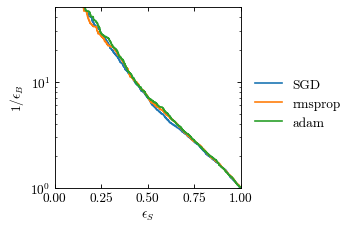

SGD: 1 / epsilon_B at a fixed e_S=0.5: 7.09
SGD: AUC=0.7623

RMSProp: 1 / epsilon_B at a fixed e_S=0.5: 7.26
RMSProp: AUC=0.7679

Adam: 1 / epsilon_B at a fixed e_S=0.5: 7.23
Adam: AUC=0.7696


In [54]:
plt.plot(tpr_model_2, 1/fpr_model_2, label='SGD')
plt.plot(tpr_methods['rmsprop'], 1/fpr_methods['rmsprop'], label='rmsprop')
plt.plot(tpr_methods['adam'], 1/fpr_methods['adam'], label='adam')
plt.ylabel('$1/\epsilon_B$')
plt.xlabel('$\epsilon_S$')
plt.yscale('log')
plt.xlim(0, 1)
plt.ylim(1, 50)
plt.legend(loc=(1.05,0.3), frameon=False)
plt.show()

print('SGD: 1 / epsilon_B at a fixed e_S=0.5' + ': {0:.2f}'.format(1/background_at_sig_50_2))
print('SGD: AUC={0:.4f}'.format(auc_model_2))
print('')
print('RMSProp: 1 / epsilon_B at a fixed e_S=0.5' + ': {0:.2f}'.format(1/working_point_methods['rmsprop']))
print('RMSProp: AUC={0:.4f}'.format(auc_methods['rmsprop']))
print('')
print('Adam: 1 / epsilon_B at a fixed e_S=0.5' + ': {0:.2f}'.format(1/working_point_methods['adam']))
print('Adam: AUC={0:.4f}'.format(auc_methods['adam']))

From this, it doesn't appear that any of the optimizers works particularly better on the test set. The best one at the working point is Adam. Up to now, we have left the architecture of the network fixed, but have changed the data (normalized it) and changed the optimizers. Now let's see if we can get a better score by either adding width to the hidden layer or by making the network deeper.

## Network architecture
Now we explore the differnt network shapes. I will put this into a dictionary which we can scan over easily. For now, just build and compile the network, but don't train it yet.

In [55]:
archs = OrderedDict()

# Smaller nodes per layer, but more layers

# The name of the model tells me how many nodes per dense layer
# 1 hidden layer
tmp_model = Sequential()
tmp_model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D50D1'] = tmp_model

# 2 hidden layers
tmp_model = Sequential()
tmp_model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D50D50D1'] = tmp_model

# 3 hidden layers
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D50D50D50D1'] = tmp_model
### Enter code here ###

# 4 hidden layers
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D50D50D50D50D1'] = tmp_model
### Enter code here ###

# Now we change the style, instead of going deeper, lets test a single layer with differnt number of nodes.

# 1 hidden layer - 10 Nodes
tmp_model = Sequential()
tmp_model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D10D1'] = tmp_model

# 1 hidden layer - 20 Nodes
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(20, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D20D1'] = tmp_model
### Enter code here ###

# 1 hidden layer - 100 Nodes
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(100, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D100D1'] = tmp_model
### Enter code here ###

# 1 hidden layer - 500 Nodes
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(500, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D500D1'] = tmp_model
### Enter code here ###

# 1 hidden layer - 1000 Nodes
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(1000, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D1000D1'] = tmp_model
### Enter code here ###

# 1 hidden layer - 10000 Nodes
## Follow the same pattern
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(10000, input_dim=X_train_scaled.shape[1], activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer='adam')
archs['D10000D1'] = tmp_model
### Enter code here ###

Now we can scan over the models in our dictionary and train them is a single loop.

In [56]:
for model in archs:
    archs[model].summary()
    training_histories[model] = archs[model].fit(X_train_scaled, y_train,
                                                  validation_split=0.1,
                                                  epochs=15,
                                                  verbose=2
                                                 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Train on 40483 samples, validate on 4499 samples
Epoch 1/15
 - 6s - loss: 0.6017 - val_loss: 0.5963
Epoch 2/15
 - 4s - loss: 0.5855 - val_loss: 0.5905
Epoch 3/15
 - 3s - loss: 0.5814 - val_loss: 0.5878
Epoch 4/15
 - 3s - loss: 0.5788 - val_loss: 0.5874
Epoch 5/15
 - 4s - loss: 0.5770 - val_loss: 0.5866
Epoch 6/15
 - 4s - loss: 0.5755 - val_loss: 0.5855
Epoch 7/15
 - 3s - loss: 0.5741 - val_loss: 0.5857
Epoch 8/15
 - 4s - loss: 0.5732 - val_loss: 0.5871
Epoch 9/15
 - 3s - loss: 0.5725 - val_loss: 0.5835
Epoch 10/15
 - 3s - loss: 0.

Now plot the losses. Because we have so many models we are comparing, I am going to put the training and validation data on different panels.

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


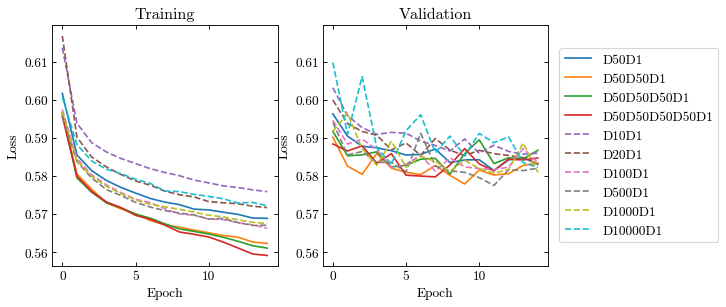

In [57]:
plt.figure(figsize=(8, 4))
for i, model in enumerate(archs):
    if i > 3:
        myls = '--'
    else:
        myls = '-'
    color = 'C{0}'.format(i)
    ax1 = plt.subplot(1, 2, 1)
    plt.plot(training_histories[model].history['loss'], color=color, ls=myls)
    plt.title('Training')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    plt.plot(training_histories[model].history['val_loss'], color=color, label=model, ls=myls)
    plt.legend(loc=(1.05, 0.1))
    plt.title('Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
plt.show()

The shallow but wide networks are shown with dashed lines. The models which do best on the *training* data are the deep networks. Again, all of the networks are having a problem genralizing, which could be fixed with more data or attempts to regularlize.

Now compute the test metrics

In [58]:
preds_archs = {}
fpr_archs = {}
tpr_archs = {}
thresholds_archs = {}
auc_archs = {}
working_point_archs = {}

for model in archs:
    preds_archs[model] = archs[model].predict(X_test_scaled)
    fpr_archs[model], tpr_archs[model], thresholds_archs[model] = roc_curve(y_true=y_test,
                                                                            y_score=preds_archs[model])
    auc_archs[model] = auc(fpr_archs[model], tpr_archs[model])
    
    background_eff = interp1d(tpr_archs[model], fpr_archs[model])
    working_point_archs[model] = background_eff(0.5)

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


D50D1: 1/ e_B at a fixed e_S=0.5: 7.308
		AUC=0.766
D50D50D1: 1/ e_B at a fixed e_S=0.5: 7.617
		AUC=0.770
D50D50D50D1: 1/ e_B at a fixed e_S=0.5: 7.515
		AUC=0.769
D50D50D50D50D1: 1/ e_B at a fixed e_S=0.5: 7.235
		AUC=0.765
D10D1: 1/ e_B at a fixed e_S=0.5: 7.014
		AUC=0.765
D20D1: 1/ e_B at a fixed e_S=0.5: 7.191
		AUC=0.767
D100D1: 1/ e_B at a fixed e_S=0.5: 7.583
		AUC=0.771
D500D1: 1/ e_B at a fixed e_S=0.5: 7.605
		AUC=0.771
D1000D1: 1/ e_B at a fixed e_S=0.5: 7.470
		AUC=0.768
D10000D1: 1/ e_B at a fixed e_S=0.5: 7.537
		AUC=0.766


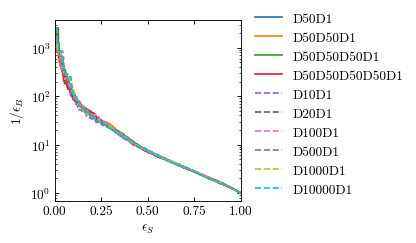

In [59]:
for i, model in enumerate(archs):
    if i > 3:
        myls = '--'
    else:
        myls = '-'
    plt.plot(tpr_archs[model], 1/fpr_archs[model], label=model, ls=myls)
    print(model + ': 1/ e_B at a fixed e_S=0.5' + ': {0:.3f}'.format(1/working_point_archs[model])),
    print('\t\tAUC={0:.3f}'.format(auc_archs[model]))
plt.ylabel('$1/\epsilon_B$')
plt.xlabel('$\epsilon_S$')
plt.yscale('log')
plt.xlim(0, 1)
plt.legend(loc=(1.05,0.), frameon=False)
plt.show()

Note that there is still not much difference in the results. This is, again, in part due to the size of our samples. 
Currently, these metrics would suggest using the model which is wider, rather than deeper. However, we should really run things many times and average over our results. I wouldn't actually think these difference are statistically meaningfull at this point. If you results are different than mine, it wouldn't surprise me.

## Longer training
As we looked at the loss histories, we see that the models are sill improving. This implies that we should not have stopped training. How do we know how many epochs to use?

One way to do the is to watch the validation loss. If it has stopped improving, we can lower the learning rate so that smaller steps are taken. If we do this a couple of times, we should get a very descent classifier.
Look up `keras.callbacks.EarlyStopping` and `keras.callbacks.ReduceLROnPlateau`. We are also going to explicity load the Adam optimizer and tell it the learning rate to start at.

In [60]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

In [61]:
EarlyStopping?

In [62]:
ReduceLROnPlateau?

In [63]:
es = EarlyStopping(patience=15,                # If the validation loss has not improved for 15 epochs, stop training
                   restore_best_weights=True,  # When we stop, go back to when it generalized to the validation data the best
                   verbose=1)

reduce_rate = ReduceLROnPlateau(patience=5, # If the validation loss has not improved for 5 epochs, lower the rate
                                factor=0.5, # cut the rate in half
                                verbose=1,  # Tell us when this happens
                                min_lr=1e-5 # If the learning rate is too small, the updates don't do very much
                               )
my_callbacks = [es, reduce_rate]

Pick your favorite model from above. Add that to the dictionary with a name of 'Final'. 

In [64]:
### Enter code here ###
tmp_model = Sequential()
tmp_model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dense(1, activation='sigmoid'))
### End code here ###

# Now we compile, where we tell Adam where to start at.
tmp_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3))
archs['EarlyStopping'] = tmp_model 

In [65]:
training_histories['EarlyStopping'] = archs['EarlyStopping'].fit(X_train, y_train,
                                                                 validation_split=0.1,
                                                                 epochs=200,
                                                                 callbacks=my_callbacks,
                                                                 verbose=1
                                                                )

Train on 40483 samples, validate on 4499 samples
Epoch 1/200
40483/40483 [==============================] - 15s 374us/step - loss: 0.6217 - val_loss: 0.6175
Epoch 2/200
40483/40483 [==============================] - 10s 238us/step - loss: 0.6047 - val_loss: 0.6057
Epoch 3/200
40483/40483 [==============================] - 11s 274us/step - loss: 0.5978 - val_loss: 0.5968
Epoch 4/200
40483/40483 [==============================] - 9s 221us/step - loss: 0.5919 - val_loss: 0.5978
Epoch 5/200
40483/40483 [==============================] - 8s 205us/step - loss: 0.5883 - val_loss: 0.5890
Epoch 6/200
40483/40483 [==============================] - 8s 190us/step - loss: 0.5855 - val_loss: 0.5867
Epoch 7/200
40483/40483 [==============================] - 6s 160us/step - loss: 0.5820 - val_loss: 0.5869
Epoch 8/200
40483/40483 [==============================] - 9s 234us/step - loss: 0.5813 - val_loss: 0.5863
Epoch 9/200
40483/40483 [==============================] - 13s 330us/step - loss: 0.5800 - v

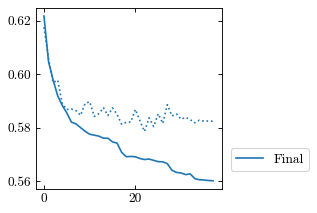

In [66]:
plt.plot(training_histories['EarlyStopping'].history['loss'], color='C0', label='Final')
plt.plot(training_histories['EarlyStopping'].history['val_loss'], color='C0', ls=':')
plt.legend(loc=(1.05, 0.1))

In [67]:
for model in ['EarlyStopping']:
    preds_archs[model] = archs[model].predict(X_test)
    fpr_archs[model], tpr_archs[model], thresholds_archs[model] = roc_curve(y_true=y_test,
                                                                            y_score=preds_archs[model])
    auc_archs[model] = auc(fpr_archs[model], tpr_archs[model])
    
    background_eff = interp1d(tpr_archs[model], fpr_archs[model])
    working_point_archs[model] = background_eff(0.5)

Now lets compare the the model with a short train time. Add the string name of your model to the array.

In [68]:
my_compare = ['D50D50D50D50D1',  # put your model comparison name in here
              'EarlyStopping']

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


D50D50D50D50D1: 1/ e_B at a fixed e_S=0.5: 7.23
D50D50D50D50D1: AUC=7.653e-01

EarlyStopping: 1/ e_B at a fixed e_S=0.5: 7.72
EarlyStopping: AUC=7.683e-01



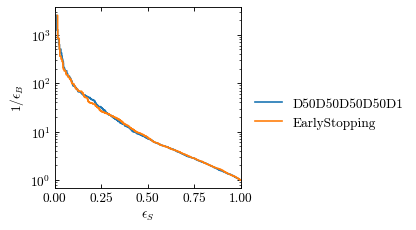

In [69]:
for model in my_compare:
    plt.plot(tpr_archs[model], 1/fpr_archs[model], label=model)
    print(model + ': 1/ e_B at a fixed e_S=0.5' + ': {0:.2f}'.format(1 / working_point_archs[model]))
    print(model + ': AUC=' + '{0:.3e}'.format(auc_archs[model]))
    print('')
plt.ylabel('$1/\epsilon_B$')
plt.xlabel('$\epsilon_S$')
plt.yscale('log')
plt.xlim(0, 1)
plt.legend(loc=(1.05,0.3), frameon=False)
plt.show()


This again makes it look like training longer is not helping, but this is coming from our over fitting of the data. It is time to reugularize our network!

## Regularize the network
One way of regularizing is to add a term to the loss function which is propotional to the each parameter (or weight), or the parameter squared. Then the gradient of the whole loss function wants to drive the weights to smaller values. It isn't intuitive, but this helps it to not make large weights just to fit specific events, but it has to work on a more broad set of features.

The other method, which is becoming much more popuar, is dropout. In the training step, we randomly remove some of the connections between nodes. This makes some of the pathways between the input and the output stop. Each time we update the network, the dropped out connections are randomly chosen. This again makes it generalize. This adds a hyperparameter to the model (the rate at which we randomly drop connections).

In [70]:
from keras.layers import Dropout

In [71]:
tmp_model = Sequential()
tmp_model.add(Dense(50, activation='relu', input_dim=X_train_scaled.shape[1]))
tmp_model.add(Dropout(0.5))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dropout(0.5))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dropout(0.5))
tmp_model.add(Dense(50, activation='relu'))
tmp_model.add(Dropout(0.5))
tmp_model.add(Dense(1, activation='sigmoid'))
tmp_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3))
archs['Dropout'] = tmp_model
archs['Dropout'].summary()

tmp_hist = tmp_model.fit(X_train_scaled, y_train,
                         validation_split=0.1,
                         epochs=100,
                         callbacks=my_callbacks,
                         verbose=1
                        )

training_histories['Dropout'] = tmp_hist

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 50)                1550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 50)                2550      
__________

You should notice that our val_loss is much closer to the loss for a long time. Let's plot this compared to the EarlyStopping model.

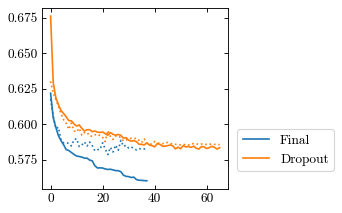

In [72]:
plt.plot(training_histories['EarlyStopping'].history['loss'], color='C0', label='Final')
plt.plot(training_histories['EarlyStopping'].history['val_loss'], color='C0', ls=':')
plt.plot(training_histories['Dropout'].history['loss'], color='C1', label='Dropout')
plt.plot(training_histories['Dropout'].history['val_loss'], color='C1', ls=':')

plt.legend(loc=(1.05, 0.1))

 How do the losses compare when we use dropout?
 
 **Optional Exercise:** Go back and change the dropout rates to see what their effects on the results.
 
 Finally, compute the metrics.

In [73]:
preds_archs['Dropout'] = tmp_model.predict(X_test_scaled)
fpr_archs['Dropout'], tpr_archs['Dropout'], thresholds_archs['Dropout'] = roc_curve(y_true=y_test,
                                                                        y_score=preds_archs['Dropout'])
auc_archs['Dropout'] = auc(fpr_archs['Dropout'], tpr_archs['Dropout'])

background_eff = interp1d(tpr_archs['Dropout'], fpr_archs['Dropout'])
working_point_archs['Dropout'] = background_eff(0.5)

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


D50D50D50D50D1:1/e_B at a fixed e_S=0.5: 7.23
D50D50D50D50D1: AUC=7.653e-01
EarlyStopping:1/e_B at a fixed e_S=0.5: 7.72
EarlyStopping: AUC=7.683e-01
Dropout:1/e_B at a fixed e_S=0.5: 7.46
Dropout: AUC=7.688e-01


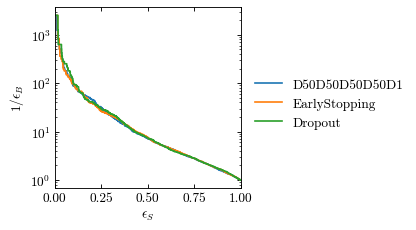

In [74]:
my_compare.append('Dropout')
for model in my_compare:
    plt.plot(tpr_archs[model], 1/fpr_archs[model], label=model)
    print(model + ':1/e_B at a fixed e_S=0.5' + ': {0:.2f}'.format(1/working_point_archs[model]))
    print(model + ': AUC=' + '{0:.3e}'.format(auc_archs[model]))

plt.ylabel('$1/\epsilon_B$')
plt.xlabel('$\epsilon_S$')
plt.yscale('log')
plt.xlim(0, 1)
plt.legend(loc=(1.05,0.3), frameon=False)
plt.show()

Our model generalizes better than before, but the results have not really improved. We seem to be reaching the limit for the data we have.

# Different representation of the data

Now we can check to see we can get the same performance with a smarter representation of the data. We will use the basis from [How much information is in a jet](https://arxiv.org/abs/1704.08249). We will use [pyjet](https://github.com/scikit-hep/pyjet) which is built on top of [fastjet](http://fastjet.fr/) to recluster our jets. Using the exclusive jets feature will allow us to pick the axis to compare against.

The next section does not have many comments, but will be updated later.

In [75]:
from pyjet import cluster,DTYPE_PTEPM

To get the n-subjettiness, we will need to compute the $\Delta R = \sqrt{\Delta\phi^2 + \Delta \eta^2}$.

In [76]:
def DeltaPhi(obj_1, obj_2):
    '''
    Calculates the delta phi, with values between -pi and pi
    inputs should be a list with a length of 3
    
    arguments:
    obj_1 = [pt, eta, phi]
    obj_2 = [pt, eta, phi]
    
    returns:
    deltaphi -- float for the angular distance
    '''
    pt1, eta1, phi1 = obj_1
    pt2, eta2, phi2 = obj_2
    deltaphi = phi1 - phi2
    if deltaphi > np.pi:
        deltaphi = (-2 * np.pi) + deltaphi
    return deltaphi


def DeltaR(obj_1, obj_2):
    '''
    Calculates the delta R
    inputs should be a list with a length of 3
    obj_1 = [pt, eta, phi]
    obj_2 = [pt, eta, phi]
    '''
    pt1, eta1, phi1 = obj_1
    pt2, eta2, phi2 = obj_2
    dr = np.sqrt(np.square(eta1 - eta2) + np.square(DeltaPhi(obj_1, obj_2)))
    return dr

In [77]:
def NSubjettiness(constituents, axes, beta, jetpt):
    '''
    Computes the n-subjettines
    
    Arguments:
    constituents -- an array of pseudovectors
    axes -- an array of pseudovectors
    jetpt -- the overall transverse momentum of the jet
        
    Returns:
    tau[0.5] -- n-subjets with the power of 0.5
    tau[1] -- n-subjets with the power of 1
    tau[2] -- n-subjets with the power of 2
    '''
    tau = {0.5: 0.0,
           1: 0.0,
           2: 0.0
           }  # starting values for different betas
    for particle in constituents:
        for beta in [0.5, 1, 2]:
            dr = np.min([np.power(DeltaR([particle.pt, particle.eta, particle.phi],
                                         [axis.pt, axis.eta, axis.phi]), beta) for axis in axes])
            tau[beta] += particle.pt * dr
    for beta in [0.5, 1, 2]:
        tau[beta] = tau[beta] / jetpt

    return tau[0.5], tau[1], tau[2]

In [78]:
X_train.shape

(44982, 30)

In [79]:
pseudojets_input = np.zeros(len([x for x in X_train[i][::3] if x > 0]), dtype=DTYPE_PTEPM)

In [80]:
NSubjettinessData = []

for jet_consituents in X_train:
    pseudojets_input = np.zeros(len([x for x in jet_consituents[::3] if x > 0]), dtype=DTYPE_PTEPM)
    
    for j in range(pseudojets_input.shape[0]):
        if (jet_consituents[j*3] > 0):  # if the pT bigger than 0
            pseudojets_input[j]['pT'] = jet_consituents[j*3]
            pseudojets_input[j]['eta'] = jet_consituents[j*3+1]
            pseudojets_input[j]['phi'] = jet_consituents[j*3+2]

    sequence = cluster(pseudojets_input, R=1, p=1)
    jet = sequence.exclusive_jets(1)[0]
    NSubjet = {}
    for pronginess in range(1, 5):
        # undo the clustering to a specific number of jets
        if len(jet.constituents()) > pronginess:
            axes = sequence.exclusive_jets(pronginess)
            nsubjettiness = NSubjettiness(jet.constituents(), axes,
                                          pronginess, jet.pt
                                         )
            NSubjet['{0}_0.5'.format(pronginess)] = nsubjettiness[0]
            NSubjet['{0}_1'.format(pronginess)] = nsubjettiness[1]
            NSubjet['{0}_2'.format(pronginess)] = nsubjettiness[2]
        else:
            NSubjet['{0}_0.5'.format(pronginess)] = 0
            NSubjet['{0}_1'.format(pronginess)] = 0
            NSubjet['{0}_2'.format(pronginess)] = 0
            
    tmp_entry = [jet.pt,
                 NSubjet['1_0.5'], NSubjet['1_1'], NSubjet['1_2'],
                 NSubjet['2_0.5'], NSubjet['2_1'], NSubjet['2_2'],
                 NSubjet['3_0.5'], NSubjet['3_1'], NSubjet['3_2'],
                 NSubjet['4_1'], NSubjet['4_2']
                ]
    NSubjettinessData.append(tmp_entry)
NSubjettinessData = np.array(NSubjettinessData)

In [81]:
NSubjettinessData.shape

(44982, 12)

In [82]:
NSubjettinessTestData = []

for jet_consituents in X_test:
    pseudojets_input = np.zeros(len([x for x in jet_consituents[::3] if x > 0]), dtype=DTYPE_PTEPM)
    
    for j in range(pseudojets_input.shape[0]):
        if (jet_consituents[j*3] > 0):  # if the pT bigger than 0
            pseudojets_input[j]['pT'] = jet_consituents[j*3]
            pseudojets_input[j]['eta'] = jet_consituents[j*3+1]
            pseudojets_input[j]['phi'] = jet_consituents[j*3+2]

    sequence = cluster(pseudojets_input, R=1, p=1)
    jet = sequence.exclusive_jets(1)[0]
    NSubjet = {}
    for pronginess in range(1, 5):
        # undo the clustering to a specific number of jets
        if len(jet.constituents()) > pronginess:
            axes = sequence.exclusive_jets(pronginess)
            nsubjettiness = NSubjettiness(jet.constituents(), axes,
                                          pronginess, jet.pt
                                         )
            NSubjet['{0}_0.5'.format(pronginess)] = nsubjettiness[0]
            NSubjet['{0}_1'.format(pronginess)] = nsubjettiness[1]
            NSubjet['{0}_2'.format(pronginess)] = nsubjettiness[2]
        else:
            NSubjet['{0}_0.5'.format(pronginess)] = 0
            NSubjet['{0}_1'.format(pronginess)] = 0
            NSubjet['{0}_2'.format(pronginess)] = 0
            
    tmp_entry = [jet.pt,
                 NSubjet['1_0.5'], NSubjet['1_1'], NSubjet['1_2'],
                 NSubjet['2_0.5'], NSubjet['2_1'], NSubjet['2_2'],
                 NSubjet['3_0.5'], NSubjet['3_1'], NSubjet['3_2'],
                 NSubjet['4_1'], NSubjet['4_2']
                ]
    NSubjettinessTestData.append(tmp_entry)
NSubjettinessTestData = np.array(NSubjettinessTestData)

In [83]:
NSubjettinessTestData.shape

(4998, 12)

Now lets rescale the data and fit some networks again.

In [84]:
SS_NSubJet = StandardScaler()
X_Train_NSubJet = SS.fit_transform(NSubjettinessData)
X_Test_NSubJet = SS.transform(NSubjettinessTestData)

## Neural networks
Now our input data is only 12 dimensional. Lets try starting with a smaller network.

In [90]:
model_subjet = Sequential()
model_subjet.add(Dense(25, input_dim=12, activation='relu'))
model_subjet.add(Dense(25, activation='relu'))
model_subjet.add(Dense(25, activation='relu'))
model_subjet.add(Dense(1, activation='sigmoid'))

model_subjet.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
model_subjet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 25)                325       
_________________________________________________________________
dense_52 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_53 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 26        
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


Now fit the data

In [92]:
hist_model_subjet = model_subjet.fit(X_Train_NSubJet,
                                     y_train,
                                     validation_split=0.1,
                                     epochs=100,
                                     verbose=2,
                                     callbacks=my_callbacks
                                    )

Train on 40483 samples, validate on 4499 samples
Epoch 1/100
 - 8s - loss: 0.5894 - val_loss: 0.5996
Epoch 2/100
 - 4s - loss: 0.5851 - val_loss: 0.5981
Epoch 3/100
 - 4s - loss: 0.5842 - val_loss: 0.5973
Epoch 4/100
 - 4s - loss: 0.5835 - val_loss: 0.5968
Epoch 5/100
 - 4s - loss: 0.5829 - val_loss: 0.5982
Epoch 6/100
 - 4s - loss: 0.5828 - val_loss: 0.5977
Epoch 7/100
 - 4s - loss: 0.5827 - val_loss: 0.5996
Epoch 8/100
 - 4s - loss: 0.5822 - val_loss: 0.6031
Epoch 9/100
 - 4s - loss: 0.5826 - val_loss: 0.6011

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 10/100
 - 4s - loss: 0.5809 - val_loss: 0.5978
Epoch 11/100
 - 4s - loss: 0.5808 - val_loss: 0.5959
Epoch 12/100
 - 4s - loss: 0.5808 - val_loss: 0.5970
Epoch 13/100
 - 4s - loss: 0.5807 - val_loss: 0.5958
Epoch 14/100
 - 4s - loss: 0.5807 - val_loss: 0.5967
Epoch 15/100
 - 4s - loss: 0.5805 - val_loss: 0.5943
Epoch 16/100
 - 4s - loss: 0.5805 - val_loss: 0.5960
Epoch 17/100
 - 4s - loss: 0.58

Make the predictions and compute the metrics.

In [93]:
preds_sub = model_subjet.predict(X_Test_NSubJet)
fpr_sub, tpr_sub, thresholds_sub = roc_curve(y_true=y_test,
                                             y_score=preds_sub)
auc_sub = auc(fpr_sub, tpr_sub)
background_eff = interp1d(tpr_sub, fpr_sub)
working_point_sub = background_eff(0.5)

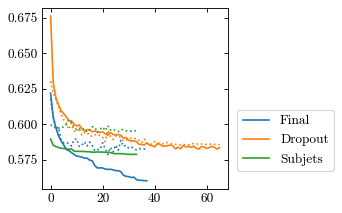

In [94]:
plt.plot(training_histories['EarlyStopping'].history['loss'], color='C0', label='Final')
plt.plot(training_histories['EarlyStopping'].history['val_loss'], color='C0', ls=':')
plt.plot(training_histories['Dropout'].history['loss'], color='C1', label='Dropout')
plt.plot(training_histories['Dropout'].history['val_loss'], color='C1', ls=':')

plt.plot(hist_model_subjet.history['loss'], color='C2', label='Subjets')
plt.plot(hist_model_subjet.history['val_loss'], color='C2', ls=':')


plt.legend(loc=(1.05, 0.1))
plt.show()